<a href="https://colab.research.google.com/github/WilliamShengYangHuang/RC18_Machine_Learning/blob/main/NLP_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NLP Sentiment Analysis


## Method 1: Textblob

https://textblob.readthedocs.io/en/dev/

TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

In [1]:
!pip install textblob
!pip install nltk

### Use Pretrain Model Punkt Tokenizer

The command `nltk.download('punkt')` is used to download the Punkt Tokenizer in the Natural Language Toolkit (NLTK) library in Python.

The Punkt Tokenizer is ***a pre-trained unsupervised machine learning model for tokenising text***. It’s particularly good at splitting text into sentences1. This tokeniser divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences1. It must be trained on a large collection of plaintext in the target language before it can be used1.

The NLTK data package includes a pre-trained Punkt tokeniser for English1. Once you have downloaded it using `nltk.download('punkt')`, you do not need to download it again

In sentiment analysis, “***Polarity***” and “***Subjectivity***” are two important indicators.

*   ***Polarity***: This is a floating-point number between -1 and 1, indicating the emotional tendency of the text. Negative values represent negative emotions, positive values represent positive emotions, and 0 represents neutral emotions. For example, the polarity of “I love this place” may be close to 1, while the polarity of “I hate this place” may be close to -1.

*   ***Subjectivity***: This is a floating-point number between 0 and 1, indicating the subjectivity of the text. The higher the value, the stronger the subjectivity of the text, and vice versa, the more objective. For example, “The sky is blue” is an objective statement, its subjectivity may be close to 0. And “The sky is beautiful” is a subjective opinion, its subjectivity may be close to 1.

These two indicators can help us understand the emotional tendency and subjectivity level of the text.

In [2]:
from textblob import TextBlob
import nltk
nltk.download('punkt')

# 'Isaura' in 'Invisible Cities' by Italo Carlvino
text = '''
Isaura, city of the thousand wells, is said to rise over a deep, subterranean lake.
On all sides, wherever the inhabitants dig long vertical holes in the ground,
they succeed in drawing up water, as far as the city extends, and no father.
Its green border repeats the dark outline of the buried lake;
an invisible landscape conditions the visible one;
everything that moves in the sunlight is driven by the lapping wave enclosed
beneath the rock’s calcareous sky. […] The city’s gods, according to some people,
live in the depths, in the black lake that feeds the underground streams.
According to others, the gods live in the buckets that rise,
suspended from a cable, as they appear over the edge of the wells,
in the revolving pulleys, in the windlasses of the norias, in the pump handles,
in the blades of the windmills that draw the water up from the drillings,
in the trestles that support the twisting probes,
in the reservoirs perched on stilts over the roofs,
in the slender arches of the aqueducts,
in all the columns of water, the vertical pipes,
the plungers, the drains,
all the way up to the weathercocks that surmount the airy scaffoldings of Isaura,
a city that moves entirely upward.
'''

blob = TextBlob(text)

for sentence in blob.sentences:
    print(sentence, sentence.sentiment.polarity, sentence.sentiment.subjectivity)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.



Isaura, city of the thousand wells, is said to rise over a deep, subterranean lake. 0.0 0.4
On all sides, wherever the inhabitants dig long vertical holes in the ground,
they succeed in drawing up water, as far as the city extends, and no father. 0.025 0.7
Its green border repeats the dark outline of the buried lake;
an invisible landscape conditions the visible one;
everything that moves in the sunlight is driven by the lapping wave enclosed
beneath the rock’s calcareous sky. -0.175 0.35
[…] The city’s gods, according to some people,
live in the depths, in the black lake that feeds the underground streams. -0.015151515151515152 0.4666666666666667
According to others, the gods live in the buckets that rise,
suspended from a cable, as they appear over the edge of the wells,
in the revolving pulleys, in the windlasses of the norias, in the pump handles,
in the blades of the windmills that draw the water up from the drillings,
in the trestles that support the twisting probes,
in the rese

In [54]:
import pandas as pd

nltk.download('punkt')

# 'Isaura' in 'Invisible Cities' by Italo Carlvino
text = '''
Isaura, city of the thousand wells, is said to rise over a deep, subterranean lake.
On all sides, wherever the inhabitants dig long vertical holes in the ground,
they succeed in drawing up water, as far as the city extends, and no father.
Its green border repeats the dark outline of the buried lake;
an invisible landscape conditions the visible one;
everything that moves in the sunlight is driven by the lapping wave enclosed
beneath the rock’s calcareous sky. […] The city’s gods, according to some people,
live in the depths, in the black lake that feeds the underground streams.
According to others, the gods live in the buckets that rise,
suspended from a cable, as they appear over the edge of the wells,
in the revolving pulleys, in the windlasses of the norias, in the pump handles,
in the blades of the windmills that draw the water up from the drillings,
in the trestles that support the twisting probes,
in the reservoirs perched on stilts over the roofs,
in the slender arches of the aqueducts,
in all the columns of water, the vertical pipes,
the plungers, the drains,
all the way up to the weathercocks that surmount the airy scaffoldings of Isaura,
a city that moves entirely upward.
'''

blob = TextBlob(text)

# Print header
print(f"{'Sentence':<80} | {'Polarity':<10} | {'Subjectivity':<13}")

# Print separator
print(f"{'-'*80} | {'-'*10} | {'-'*13}")

# Print sentences and their sentiment scores
for sentence in blob.sentences:
    print(f"{str(sentence):<80} | {sentence.sentiment.polarity:<10.2f} | {sentence.sentiment.subjectivity:<13.2f}")

# Create an empty DataFrame
df = pd.DataFrame(columns=['Sentence', 'Polarity', 'Subjectivity'])

for sentence in blob.sentences:
    # Add the sentence and its sentiment analysis output to the DataFrame
    new_df = pd.DataFrame({'Sentence': [str(sentence)], 'Polarity': [sentence.sentiment.polarity], 'Subjectivity': [sentence.sentiment.subjectivity]})
    df = pd.concat([df, new_df], ignore_index=True)

# Preview DataFrame
df

Sentence                                                                         | Polarity   | Subjectivity 
-------------------------------------------------------------------------------- | ---------- | -------------

Isaura, city of the thousand wells, is said to rise over a deep, subterranean lake. | 0.00       | 0.40         
On all sides, wherever the inhabitants dig long vertical holes in the ground,
they succeed in drawing up water, as far as the city extends, and no father. | 0.03       | 0.70         
Its green border repeats the dark outline of the buried lake;
an invisible landscape conditions the visible one;
everything that moves in the sunlight is driven by the lapping wave enclosed
beneath the rock’s calcareous sky. | -0.17      | 0.35         
[…] The city’s gods, according to some people,
live in the depths, in the black lake that feeds the underground streams. | -0.02      | 0.47         
According to others, the gods live in the buckets that rise,
suspended from a 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Sentence,Polarity,Subjectivity
0,"\nIsaura, city of the thousand wells, is said ...",0.000000,0.400000
1,"On all sides, wherever the inhabitants dig lon...",0.025000,0.700000
2,Its green border repeats the dark outline of t...,-0.175000,0.350000
3,"[…] The city’s gods, according to some people,...",-0.015152,0.466667
4,"According to others, the gods live in the buck...",0.068182,0.562500


<ipython-input-55-205c6c746c15>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Polarity', y='Sentence', inner='stick', palette='Dark2')


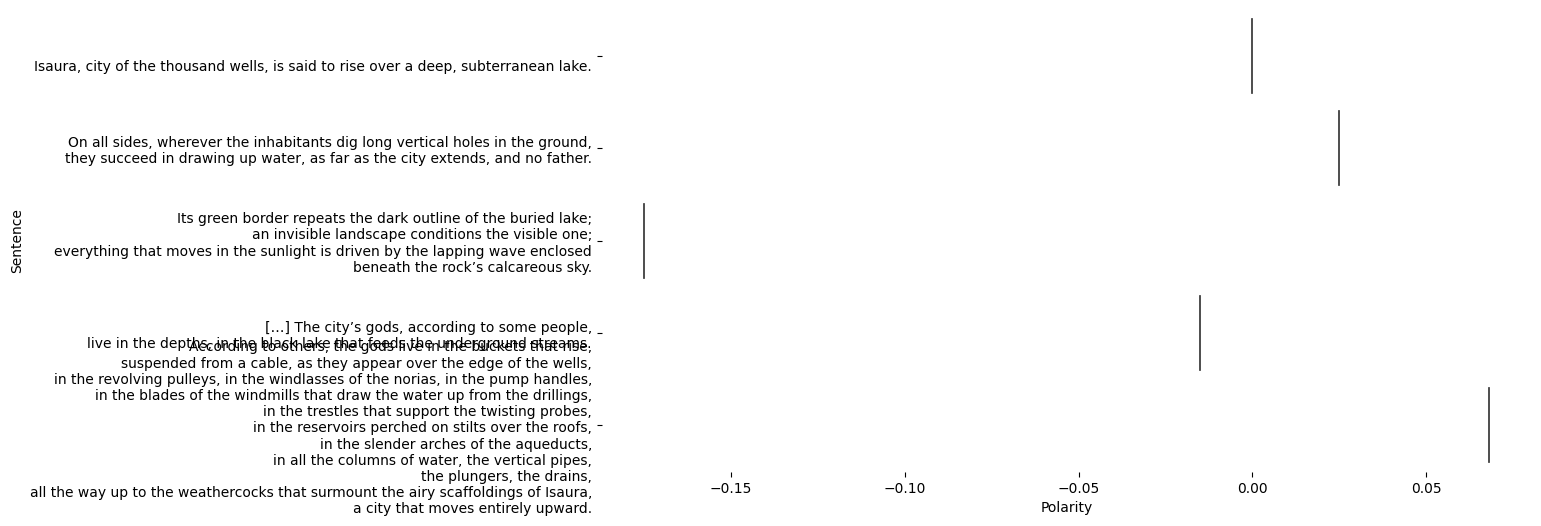

In [55]:
# @title Sentence vs Polarity

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Sentence'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Polarity', y='Sentence', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

### Custom Sentiment Analysis (Train a Classifier)

In [45]:
from textblob.classifiers import NaiveBayesClassifier

# training data
train=[
        ('The innovative design of this building is truly breathtaking','pos'),
        ("This skyscraper's skyline silhouette is stunningly iconic",'pos'),
        ('The ingenious layout maximises both functionality and beauty','pos'),
        ("This historic renovation wonderfully preserves the building's character while adding modern touches",'pos'),
        ("This public space architecture fosters community and connectivity",'pos'),
        ("This building's design is utterly unappealing and uninspiring",'neg'),
        ('The lack of natural light in this structure makes it feel gloomy','neg'),
        ('These rooms are too cramped and poorly laid out','neg'),
        ('The facade of this building is bland and lacks character','neg'),
        ('This skyscraper is an eyesore in the city skyline','neg')
]

# test data
test=[
        ('The design effectively balances practicality and aesthetic appeal','pos'),
        ('This building is beautiful','pos'),
        ('The materials used in this construction seem cheap and low-quality','neg'),
        ('This structure is not only unattractive but also seems unsafe','neg')
]

# create and train classifier (Naive Bayes model)
cl=NaiveBayesClassifier(train)

# classifying test sentence
for sentence in test:
    prob_dist = cl.prob_classify(sentence[0])
    print(f"{sentence[0]} : {prob_dist.max()} with a probability of {prob_dist.prob(prob_dist.max())}")


The design effectively balances practicality and aesthetic appeal : pos with a probability of 0.6028779358253392
This building is beautiful : pos with a probability of 0.7484599589322382
The materials used in this construction seem cheap and low-quality : neg with a probability of 0.9172906739278415
This structure is not only unattractive but also seems unsafe : neg with a probability of 0.552027857435476


## Method 2: SnowNLP (Chinese text processing mainly)

https://pypi.org/project/snownlp/

https://github.com/isnowfy/snownlp

 SnowNLP is a library written in Python, designed to conveniently process Chinese text content. Inspired by TextBlob, it was developed in response to the fact that most natural language processing libraries are primarily focused on English. As a result, SnowNLP was created to facilitate the handling of Chinese text. Unlike TextBlob, it does not use NLTK; instead, all algorithms are self-implemented. Additionally, SnowNLP comes with some pre-trained dictionaries for immediate use.

 This output score represents the sentiment of the text, where:

*   A score close to 0 indicates a negative sentiment.
*   A score close to 1 indicates a positive sentiment.


In [4]:
!pip install snownlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for snownlp: filename=snownlp-0.12.3-py3-none-any.whl size=37760944 sha256=fcb9519a140b52c51b13cf74a000d7865fc7a423fb381a622832b23748751e3d
  Stored in directory: /root/.cache/pip/wheels/43/f3/70/8990fc249efeb396007766676706f71dd3d1ca3c023ce522ce
Successfully built snownlp


In [26]:
from snownlp import SnowNLP

In [27]:
s = SnowNLP('看看这美丽的人群')

# Retrieving the sentiment score of the text
s.sentiments

0.9496332125236754

In [38]:
s = SnowNLP('看看这人群')

# Retrieving the sentiment score of the text
s.sentiments

#===========================
# As shown above, '美丽的' has significant positive influence.

0.6923076923076924

In [41]:
s = SnowNLP('看看这群傻子')

# Retrieving the sentiment score of the text
s.sentiments

0.2767393309501337

In [42]:
s = SnowNLP('看看这群沙雕')

# Retrieving the sentiment score of the text
s.sentiments

#===========================
### Internet slangs can confuse the model significantly.

0.9385247040519207

This method doesn't work well with English texts.

In [34]:
s = SnowNLP('what a beautiful day')

# Retrieving the sentiment score of the text
s.sentiments

0.13949471482418563

In [35]:
s = SnowNLP('what the hell')

# Retrieving the sentiment score of the text
s.sentiments

0.5